In [1]:
%load_ext autoreload
%autoreload 2

# Dependencies

In [2]:
import sys
sys.path.append('..')

In [3]:
import os
import matplotlib.pyplot as plt

# torch
import torch
import torchaudio
from torch.utils.data import DataLoader

# model training
from cnn import CNNetwork
from dataset import VoiceDataset
from train import train

## Globals

In [4]:
DATA_PATH = os.path.join('..', 'data')

In [5]:
TRAIN_PATH = os.path.join(DATA_PATH, 'train')
TEST_PATH = os.path.join(DATA_PATH, 'test')

In [6]:
EPOCHS = 100
BATCH_SIZE = 128
LEARNING_RATE = 0.001
SAMPLE_RATE=16000

In [7]:
MEL_SPEC = torchaudio.transforms.MelSpectrogram(
    n_fft=1024,
    hop_length=512,
    n_mels=64,
    sample_rate=SAMPLE_RATE,
)

# `train()` setup

In [8]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"
print(f"Using {device} device.")

Using cpu device.


In [9]:
# Datasets
train_dataset = VoiceDataset(TRAIN_PATH, MEL_SPEC, SAMPLE_RATE, device)
test_dataset = VoiceDataset(TEST_PATH, MEL_SPEC, SAMPLE_RATE, device)

# Dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [10]:
model = CNNetwork().to(device)

In [11]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Train/Test

In [12]:
history = train(
    model,
    train_dataloader,
    loss_fn,
    optimizer,
    device,
    EPOCHS,
    test_dataloader
)

Training model...:   0%|                                                           | 0/100 [00:00<?, ?it/s]

Epoch 1


Training model...:   1%|▍                                                | 1/100 [00:45<1:15:43, 45.89s/it]

Training Loss: 0.73, Training Accuracy  0.84
Testing Loss: 0.71, Testing Accuracy  0.84
-------------------------------------------- 

Epoch 2


Training model...:   2%|▉                                                | 2/100 [01:31<1:14:30, 45.61s/it]

Training Loss: 0.73, Training Accuracy  0.82
Testing Loss: 0.76, Testing Accuracy  0.79
-------------------------------------------- 

Epoch 3


Training model...:   3%|█▍                                               | 3/100 [02:16<1:13:38, 45.55s/it]

Training Loss: 0.77, Training Accuracy  0.78
Testing Loss: 0.71, Testing Accuracy  0.84
-------------------------------------------- 

Epoch 4


Training model...:   4%|█▉                                               | 4/100 [03:02<1:12:43, 45.46s/it]

Training Loss: 0.73, Training Accuracy  0.82
Testing Loss: 0.66, Testing Accuracy  0.89
-------------------------------------------- 

Epoch 5


Training model...:   5%|██▍                                              | 5/100 [03:47<1:11:51, 45.38s/it]

Training Loss: 0.65, Training Accuracy  0.90
Testing Loss: 0.71, Testing Accuracy  0.84
-------------------------------------------- 

Epoch 6


Training model...:   6%|██▉                                              | 6/100 [04:32<1:11:05, 45.37s/it]

Training Loss: 0.65, Training Accuracy  0.90
Testing Loss: 0.55, Testing Accuracy  1.00
-------------------------------------------- 

Epoch 7


Training model...:   7%|███▍                                             | 7/100 [05:17<1:10:09, 45.27s/it]

Training Loss: 0.60, Training Accuracy  0.95
Testing Loss: 0.55, Testing Accuracy  1.00
-------------------------------------------- 

Epoch 8


Training model...:   8%|███▉                                             | 8/100 [06:03<1:09:29, 45.32s/it]

Training Loss: 0.59, Training Accuracy  0.96
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 9


Training model...:   9%|████▍                                            | 9/100 [06:48<1:08:47, 45.36s/it]

Training Loss: 0.59, Training Accuracy  0.96
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 10


Training model...:  10%|████▊                                           | 10/100 [07:34<1:08:08, 45.42s/it]

Training Loss: 0.59, Training Accuracy  0.96
Testing Loss: 0.55, Testing Accuracy  1.00
-------------------------------------------- 

Epoch 11


Training model...:  11%|█████▎                                          | 11/100 [08:19<1:07:23, 45.43s/it]

Training Loss: 0.58, Training Accuracy  0.97
Testing Loss: 0.55, Testing Accuracy  1.00
-------------------------------------------- 

Epoch 12


Training model...:  12%|█████▊                                          | 12/100 [09:05<1:07:02, 45.71s/it]

Training Loss: 0.58, Training Accuracy  0.97
Testing Loss: 0.71, Testing Accuracy  0.84
-------------------------------------------- 

Epoch 13


Training model...:  13%|██████▏                                         | 13/100 [09:52<1:06:43, 46.02s/it]

Training Loss: 0.61, Training Accuracy  0.94
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 14
Training Loss: 0.59, Training Accuracy  0.96


Training model...:  14%|██████▋                                         | 14/100 [10:52<1:12:04, 50.28s/it]

Testing Loss: 0.55, Testing Accuracy  1.00
-------------------------------------------- 

Epoch 15


Training model...:  15%|███████                                        | 15/100 [16:47<3:21:11, 142.02s/it]

Training Loss: 0.58, Training Accuracy  0.97
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 16


Training model...:  16%|███████▌                                       | 16/100 [17:38<2:40:16, 114.49s/it]

Training Loss: 0.58, Training Accuracy  0.97
Testing Loss: 0.55, Testing Accuracy  1.00
-------------------------------------------- 

Epoch 17


Training model...:  17%|████████▏                                       | 17/100 [18:25<2:10:31, 94.35s/it]

Training Loss: 0.58, Training Accuracy  0.97
Testing Loss: 0.55, Testing Accuracy  1.00
-------------------------------------------- 

Epoch 18


Training model...:  18%|████████▋                                       | 18/100 [19:13<1:49:46, 80.32s/it]

Training Loss: 0.58, Training Accuracy  0.98
Testing Loss: 0.55, Testing Accuracy  1.00
-------------------------------------------- 

Epoch 19


Training model...:  19%|█████████                                       | 19/100 [20:00<1:35:02, 70.40s/it]

Training Loss: 0.58, Training Accuracy  0.97
Testing Loss: 0.55, Testing Accuracy  1.00
-------------------------------------------- 

Epoch 20


Training model...:  20%|█████████▌                                      | 20/100 [20:47<1:24:38, 63.48s/it]

Training Loss: 0.59, Training Accuracy  0.96
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 21


Training model...:  21%|██████████                                      | 21/100 [21:35<1:17:10, 58.62s/it]

Training Loss: 0.64, Training Accuracy  0.91
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 22


Training model...:  22%|██████████▌                                     | 22/100 [22:23<1:12:04, 55.44s/it]

Training Loss: 0.59, Training Accuracy  0.96
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 23


Training model...:  23%|███████████                                     | 23/100 [23:11<1:08:20, 53.25s/it]

Training Loss: 0.57, Training Accuracy  0.98
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 24


Training model...:  24%|███████████▌                                    | 24/100 [23:57<1:04:54, 51.25s/it]

Training Loss: 0.57, Training Accuracy  0.98
Testing Loss: 0.55, Testing Accuracy  1.00
-------------------------------------------- 

Epoch 25


Training model...:  25%|████████████                                    | 25/100 [24:44<1:02:18, 49.84s/it]

Training Loss: 0.57, Training Accuracy  0.98
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 26


Training model...:  26%|████████████▍                                   | 26/100 [25:31<1:00:17, 48.88s/it]

Training Loss: 0.57, Training Accuracy  0.99
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 27


Training model...:  27%|█████████████▌                                    | 27/100 [26:17<58:38, 48.20s/it]

Training Loss: 0.56, Training Accuracy  0.99
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 28


Training model...:  28%|██████████████                                    | 28/100 [27:04<57:20, 47.78s/it]

Training Loss: 0.56, Training Accuracy  0.99
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 29


Training model...:  29%|█████████████▉                                  | 29/100 [28:51<1:17:25, 65.43s/it]

Training Loss: 0.56, Training Accuracy  0.99
Testing Loss: 0.55, Testing Accuracy  1.00
-------------------------------------------- 

Epoch 30


Training model...:  30%|██████████████                                 | 30/100 [42:13<5:34:16, 286.52s/it]

Training Loss: 0.56, Training Accuracy  0.99
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 31


Training model...:  31%|██████████████▌                                | 31/100 [42:59<4:06:37, 214.46s/it]

Training Loss: 0.56, Training Accuracy  0.99
Testing Loss: 0.55, Testing Accuracy  1.00
-------------------------------------------- 

Epoch 32


Training model...:  32%|███████████████                                | 32/100 [43:45<3:05:47, 163.94s/it]

Training Loss: 0.56, Training Accuracy  0.99
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 33


Training model...:  33%|███████████████▌                               | 33/100 [44:32<2:23:41, 128.67s/it]

Training Loss: 0.57, Training Accuracy  0.98
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 34


Training model...:  34%|███████████████▉                               | 34/100 [45:18<1:54:26, 104.04s/it]

Training Loss: 0.57, Training Accuracy  0.98
Testing Loss: 0.55, Testing Accuracy  1.00
-------------------------------------------- 

Epoch 35


Training model...:  35%|████████████████▊                               | 35/100 [46:05<1:33:56, 86.71s/it]

Training Loss: 0.57, Training Accuracy  0.98
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 36


Training model...:  36%|█████████████████▎                              | 36/100 [46:51<1:19:35, 74.62s/it]

Training Loss: 0.62, Training Accuracy  0.93
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 37


Training model...:  37%|█████████████████▊                              | 37/100 [47:37<1:09:28, 66.17s/it]

Training Loss: 0.59, Training Accuracy  0.96
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 38


Training model...:  38%|██████████████████▏                             | 38/100 [48:24<1:02:15, 60.24s/it]

Training Loss: 0.57, Training Accuracy  0.98
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 39


Training model...:  39%|███████████████████▌                              | 39/100 [49:11<57:10, 56.24s/it]

Training Loss: 0.56, Training Accuracy  0.99
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 40


Training model...:  40%|████████████████████                              | 40/100 [49:57<53:20, 53.35s/it]

Training Loss: 0.57, Training Accuracy  0.99
Testing Loss: 0.55, Testing Accuracy  1.00
-------------------------------------------- 

Epoch 41


Training model...:  41%|████████████████████▌                             | 41/100 [50:43<50:19, 51.18s/it]

Training Loss: 0.58, Training Accuracy  0.97
Testing Loss: 0.55, Testing Accuracy  1.00
-------------------------------------------- 

Epoch 42


Training model...:  42%|█████████████████████                             | 42/100 [51:30<48:04, 49.73s/it]

Training Loss: 0.56, Training Accuracy  0.99
Testing Loss: 0.55, Testing Accuracy  1.00
-------------------------------------------- 

Epoch 43


Training model...:  43%|█████████████████████▌                            | 43/100 [52:16<46:10, 48.61s/it]

Training Loss: 0.56, Training Accuracy  0.99
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 44


Training model...:  44%|████████████████████▋                          | 44/100 [58:22<2:14:12, 143.79s/it]

Training Loss: 0.56, Training Accuracy  0.99
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 45


Training model...:  45%|████████████████████▎                        | 45/100 [1:14:56<6:05:37, 398.86s/it]

Training Loss: 0.56, Training Accuracy  0.99
Testing Loss: 0.55, Testing Accuracy  1.00
-------------------------------------------- 

Epoch 46


Training model...:  46%|████████████████████▋                        | 46/100 [1:15:48<4:25:15, 294.73s/it]

Training Loss: 0.56, Training Accuracy  0.99
Testing Loss: 0.55, Testing Accuracy  1.00
-------------------------------------------- 

Epoch 47


Training model...:  47%|█████████████████████▏                       | 47/100 [1:16:37<3:15:15, 221.05s/it]

Training Loss: 0.56, Training Accuracy  0.99
Testing Loss: 0.55, Testing Accuracy  1.00
-------------------------------------------- 

Epoch 48


Training model...:  48%|█████████████████████▌                       | 48/100 [1:17:27<2:27:04, 169.71s/it]

Training Loss: 0.56, Training Accuracy  0.99
Testing Loss: 0.55, Testing Accuracy  1.00
-------------------------------------------- 

Epoch 49


Training model...:  49%|██████████████████████                       | 49/100 [1:18:15<1:53:23, 133.41s/it]

Training Loss: 0.56, Training Accuracy  0.99
Testing Loss: 0.55, Testing Accuracy  1.00
-------------------------------------------- 

Epoch 50


Training model...:  50%|██████████████████████▌                      | 50/100 [1:19:04<1:30:06, 108.12s/it]

Training Loss: 0.56, Training Accuracy  0.99
Testing Loss: 0.55, Testing Accuracy  1.00
-------------------------------------------- 

Epoch 51


Training model...:  51%|███████████████████████▍                      | 51/100 [1:19:53<1:13:39, 90.18s/it]

Training Loss: 0.56, Training Accuracy  0.99
Testing Loss: 0.55, Testing Accuracy  1.00
-------------------------------------------- 

Epoch 52


Training model...:  52%|███████████████████████▉                      | 52/100 [1:20:43<1:02:36, 78.25s/it]

Training Loss: 0.56, Training Accuracy  0.99
Testing Loss: 0.55, Testing Accuracy  1.00
-------------------------------------------- 

Epoch 53


Training model...:  53%|█████████████████████████▍                      | 53/100 [1:21:34<54:50, 70.00s/it]

Training Loss: 0.56, Training Accuracy  0.99
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 54


Training model...:  54%|█████████████████████████▉                      | 54/100 [1:22:23<48:58, 63.89s/it]

Training Loss: 0.56, Training Accuracy  0.99
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 55


Training model...:  55%|██████████████████████████▍                     | 55/100 [1:23:13<44:39, 59.54s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 56


Training model...:  56%|██████████████████████████▉                     | 56/100 [1:24:04<41:47, 57.00s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 57


Training model...:  57%|███████████████████████████▎                    | 57/100 [1:24:54<39:16, 54.80s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 58


Training model...:  58%|███████████████████████████▊                    | 58/100 [1:25:45<37:42, 53.87s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 59


Training model...:  59%|████████████████████████████▎                   | 59/100 [1:26:33<35:35, 52.09s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 60


Training model...:  60%|████████████████████████████▊                   | 60/100 [1:27:20<33:44, 50.61s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 61


Training model...:  61%|█████████████████████████████▎                  | 61/100 [1:28:07<32:06, 49.40s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 62


Training model...:  62%|█████████████████████████████▊                  | 62/100 [1:28:55<31:04, 49.06s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 63


Training model...:  63%|████████████████████████████▎                | 63/100 [1:34:40<1:24:59, 137.81s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 64


Training model...:  64%|████████████████████████████▊                | 64/100 [1:36:13<1:14:31, 124.21s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 65


Training model...:  65%|██████████████████████████████▌                | 65/100 [1:36:59<58:45, 100.72s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 66


Training model...:  66%|███████████████████████████████▋                | 66/100 [1:37:44<47:44, 84.24s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 67


Training model...:  67%|████████████████████████████████▏               | 67/100 [1:38:30<39:57, 72.66s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 68


Training model...:  68%|████████████████████████████████▋               | 68/100 [1:39:15<34:23, 64.50s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 69


Training model...:  69%|█████████████████████████████████               | 69/100 [1:40:01<30:24, 58.84s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 70


Training model...:  70%|█████████████████████████████████▌              | 70/100 [1:40:47<27:28, 54.94s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 71


Training model...:  71%|██████████████████████████████████              | 71/100 [1:41:33<25:16, 52.30s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 72


Training model...:  72%|██████████████████████████████████▌             | 72/100 [1:42:19<23:32, 50.44s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 73


Training model...:  73%|███████████████████████████████████             | 73/100 [1:43:05<22:06, 49.12s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 74


Training model...:  74%|███████████████████████████████████▌            | 74/100 [1:43:51<20:54, 48.24s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 75


Training model...:  75%|████████████████████████████████████            | 75/100 [1:44:38<19:53, 47.73s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 76


Training model...:  76%|████████████████████████████████████▍           | 76/100 [1:45:25<18:58, 47.45s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 77


Training model...:  77%|████████████████████████████████████▉           | 77/100 [1:46:15<18:32, 48.38s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 78


Training model...:  78%|███████████████████████████████████          | 78/100 [2:03:08<2:03:52, 337.83s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 79


Training model...:  79%|███████████████████████████████████▌         | 79/100 [2:21:11<3:16:23, 561.12s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 80


Training model...:  80%|████████████████████████████████████         | 80/100 [2:26:56<2:45:26, 496.31s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 81


Training model...:  81%|████████████████████████████████████▍        | 81/100 [2:32:40<2:22:42, 450.67s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 82


Training model...:  82%|████████████████████████████████████▉        | 82/100 [2:33:26<1:38:46, 329.24s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 83


Training model...:  83%|█████████████████████████████████████▎       | 83/100 [2:39:10<1:34:32, 333.69s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 84


Training model...:  84%|█████████████████████████████████████▊       | 84/100 [2:55:21<2:19:58, 524.89s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 85


Training model...:  85%|██████████████████████████████████████▎      | 85/100 [3:11:28<2:44:22, 657.47s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 86


Training model...:  86%|██████████████████████████████████████▋      | 86/100 [3:29:05<3:01:23, 777.36s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 87


Training model...:  87%|███████████████████████████████████████▏     | 87/100 [3:45:40<3:02:34, 842.66s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 88


Training model...:  88%|███████████████████████████████████████▌     | 88/100 [3:46:25<2:00:42, 603.57s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 89


Training model...:  89%|████████████████████████████████████████     | 89/100 [3:47:11<1:19:58, 436.20s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 90


Training model...:  90%|██████████████████████████████████████████▎    | 90/100 [3:47:57<53:10, 319.00s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 91


Training model...:  91%|██████████████████████████████████████████▊    | 91/100 [3:48:43<35:35, 237.23s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 92


Training model...:  92%|███████████████████████████████████████████▏   | 92/100 [3:49:29<23:59, 179.94s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 93


Training model...:  93%|███████████████████████████████████████████▋   | 93/100 [3:50:16<16:19, 139.92s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 94


Training model...:  94%|████████████████████████████████████████████▏  | 94/100 [3:51:02<11:11, 111.90s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 95


Training model...:  95%|█████████████████████████████████████████████▌  | 95/100 [3:51:49<07:41, 92.29s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 96


Training model...:  96%|██████████████████████████████████████████████  | 96/100 [3:52:35<05:14, 78.51s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 97


Training model...:  97%|██████████████████████████████████████████████▌ | 97/100 [3:53:22<03:26, 68.89s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 98


Training model...:  98%|███████████████████████████████████████████████ | 98/100 [3:54:09<02:04, 62.29s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 99


Training model...:  99%|███████████████████████████████████████████████▌| 99/100 [3:54:55<00:57, 57.51s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

Epoch 100


Training model...: 100%|██████████████████████████████████████████████| 100/100 [3:55:42<00:00, 141.42s/it]

Training Loss: 0.56, Training Accuracy  1.00
Testing Loss: 0.60, Testing Accuracy  0.95
-------------------------------------------- 

---- Finished Training ----


# Visualizations

In [13]:
training_acc = history[0]
training_loss = history[1]

testing_acc = history[2]
testing_loss = history[3]

In [14]:
training_acc

[0.8374877450980392,
 0.8210804738562091,
 0.7776654411764705,
 0.8229084967320262,
 0.8986928104575163,
 0.9012969771241829,
 0.9519035947712419,
 0.9622385620915032,
 0.9646691176470588,
 0.9626674836601308,
 0.9725674019607843,
 0.9748243464052287,
 0.9399244281045752,
 0.9599816176470587,
 0.9701368464052288,
 0.9713541666666666,
 0.9742177287581698,
 0.9750837418300653,
 0.9717013888888889,
 0.9637949346405228,
 0.911188725490196,
 0.9630187908496732,
 0.9770812908496732,
 0.9781209150326797,
 0.983766339869281,
 0.9860232843137254,
 0.9878451797385621,
 0.9881944444444445,
 0.9877593954248365,
 0.9890625,
 0.9874121732026143,
 0.9896691176470588,
 0.9783803104575163,
 0.9782087418300652,
 0.9789052287581699,
 0.9285559640522875,
 0.9646670751633987,
 0.9842871732026143,
 0.9876736111111111,
 0.9861111111111112,
 0.9729166666666667,
 0.9882802287581699,
 0.9895812908496732,
 0.9901041666666667,
 0.9905371732026143,
 0.9928819444444444,
 0.9944444444444445,
 0.9946180555555556,
 0.

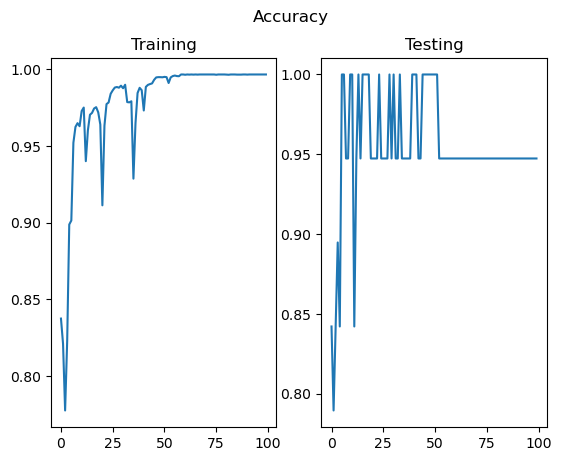

In [15]:
fig = plt.figure()
fig.suptitle("Accuracy")
ax = fig.subplots(1, 2)
ax[0].plot(training_acc)
ax[0].title.set_text("Training")
ax[1].plot(testing_acc)
ax[1].title.set_text("Testing")

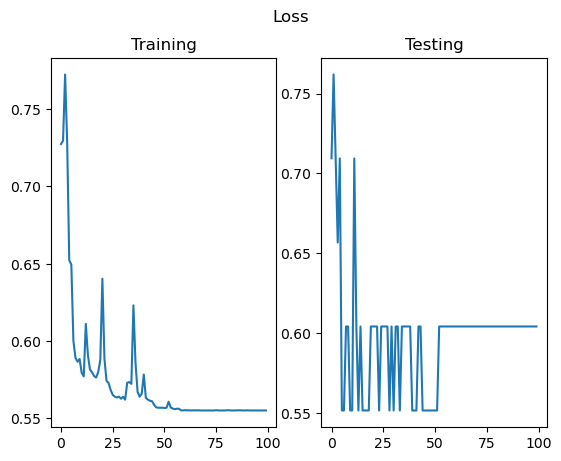

In [16]:
fig = plt.figure()
fig.suptitle("Loss")
ax = fig.subplots(1, 2)
ax[0].plot(training_loss)
ax[0].title.set_text("Training")
ax[1].plot(testing_loss)
ax[1].title.set_text("Testing")